### Goal: How does 'features' of song affect its 'popularity' (Ranking or Streams) on 'Various Platforms'

### 1. Importing and Information of Data

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

# Used for regex(duplicates cleaning)
import re

In [5]:
# Reading Dataset
spotdata = pd.read_csv('spotifyfeatures.csv',header = 0)

In [6]:
# Check some rows
spotdata.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969          4-Apr    0.814  
1       0.0868  174.003          4-Apr    0.816  
2       0.0362   99.488          5-Apr    0.368  
3       0.0395  171.758          4-Apr    0.227  
4       0.0456  140.576          4-Apr    0.390

In [7]:
print("Data type : ", type(spotdata))
print("Data dims : ", spotdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (232725, 18)


In [8]:
print(spotdata.dtypes)

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object


## Variable description

Description of the dataset, as available on Kaggle, is as follows.
Source : https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db#SpotifyFeatures.csv

- **genre**: Genre of the song
- **artist_name**: Name of the artist(s) of the song
- **track_name**: Name of the song
- **track_id**: Unique ID track associated to a song
- **popularity**: A score given to rank the popularity of the song from 0-100
- **acousticness**: Amount of acoustic sound in the song
- **danceability**: Percentage indicating how suitable the song is for dancing
- **duration_ms**: Length of the song
- **energy**: Perceived energy level of the song
- **instrumentalness**: Amount of instrumental content in the song
- **key**: Key of the song
- **liveness**: Presence of live performance elements
- **loudness**: Subjective presence of sound pressure
- **mode**: Mode of the song (major or minor)
- **speechiness**: Amount of spoken words in the song
- **tempo**: Pace of the song measured in beats per minute
- **valence**: Positivity of the song's musical content


### Exploratory data analysis

#### 3a) Correlation between Features & Popularity
> There are total 12 Features we look at...
- **acousticness**: Amount of acoustic sound in the song
- **danceability**: Percentage indicating how suitable the song is for dancing
- **duration_ms**: Length of the song
- **energy**: Perceived energy level of the song
- **instrumentalness**: Amount of instrumental content in the song
- **key**: Key of the song
- **liveness**: Presence of live performance elements
- **loudness**: Subjective presence of sound pressure
- **mode**: Mode of the song (major or minor)
- **speechiness**: Amount of spoken words in the song
- **tempo**: Pace of the song measured in beats per minute
- **valence**: Positivity of the song's musical content

---

**Caveats**
- "key" and "mode" are Strings and Catergorical -> Analyse seperately from other Features

In [9]:
pd.isnull(spotdata).sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [10]:
popDF = pd.DataFrame(spotdata["popularity"])

In [11]:
popDF.describe()

popularity
count  232725.000000
mean       41.127502
std        18.189948
min         0.000000
25%        29.000000
50%        43.000000
75%        55.000000
max       100.000000

<Axes: >

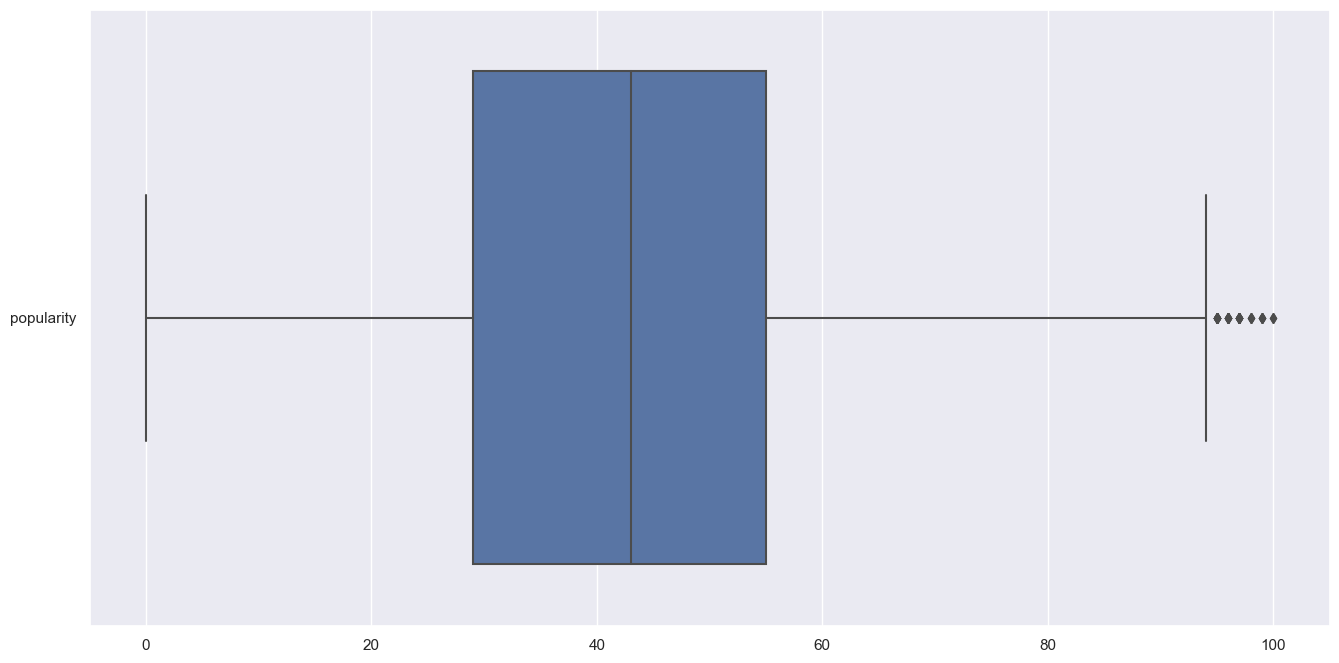

In [12]:
# BOXPLOT of "popularity"
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = popDF, orient = "h")  

Text(0.5, 1.0, 'Popularity distribution')

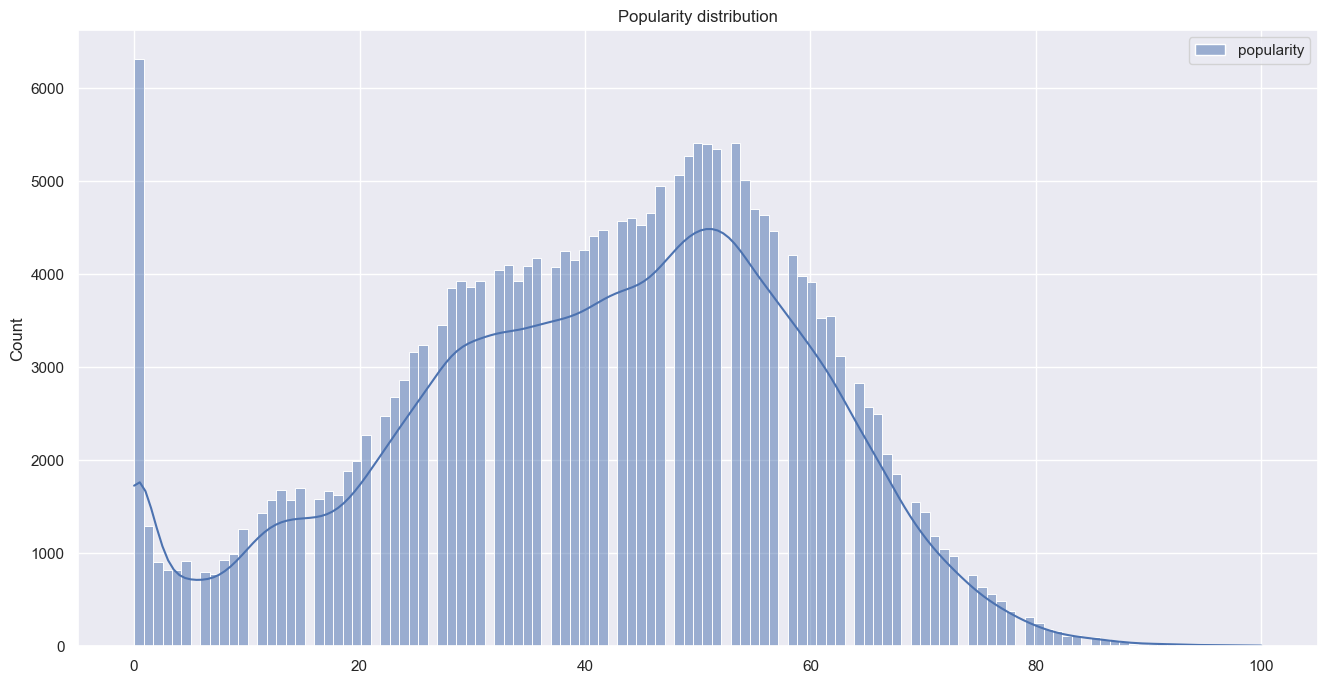

In [13]:
# KDE for 'popularity' 
f = plt.figure(figsize=(16, 8))
sb.histplot(data = popDF, kde = True).set_title("Popularity distribution")

<Axes: >

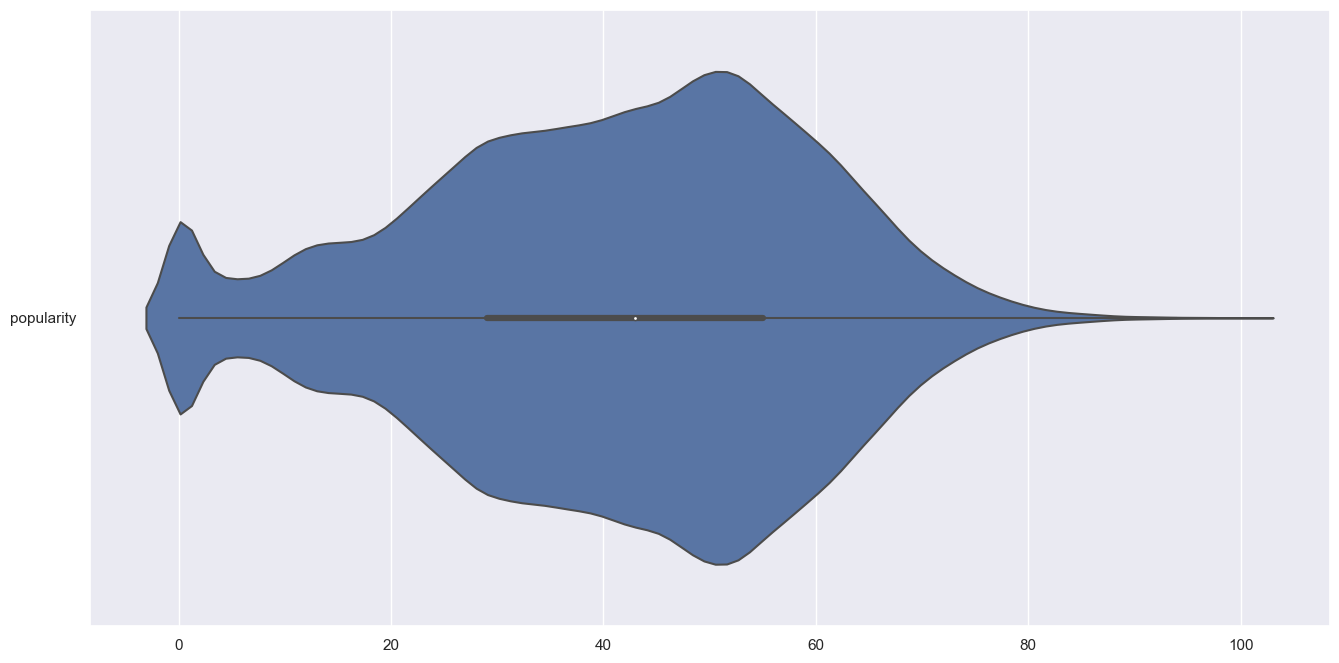

In [14]:
# VIOLIN PLOT for "popularity"
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = popDF, orient = "h")

##### Exploring the 10 numerical figures 

In [15]:
#tempo, loudness and duration_ms have much larger values in comparison to the other 7 and will be shown seperately
# Extract only the numeric data variables
numFeature = pd.DataFrame(spotdata[["danceability", "valence", "energy", "acousticness", "instrumentalness","liveness","speechiness"]])

# Summary Statistics for all Variables
numFeature.describe()

danceability        valence         energy   acousticness  \
count  232725.000000  232725.000000  232725.000000  232725.000000   
mean        0.554364       0.454917       0.570958       0.368560   
std         0.185608       0.260065       0.263456       0.354768   
min         0.056900       0.000000       0.000020       0.000000   
25%         0.435000       0.237000       0.385000       0.037600   
50%         0.571000       0.444000       0.605000       0.232000   
75%         0.692000       0.660000       0.787000       0.722000   
max         0.989000       1.000000       0.999000       0.996000   

       instrumentalness       liveness    speechiness  
count     232725.000000  232725.000000  232725.000000  
mean           0.148301       0.215009       0.120765  
std            0.302768       0.198273       0.185518  
min            0.000000       0.009670       0.022200  
25%            0.000000       0.097400       0.036700  
50%            0.000044       0.128000       0.050100  
75%            0.035800       0.264000       0.105000  
max            0.999000       1.000000       0.967000

<Axes: >

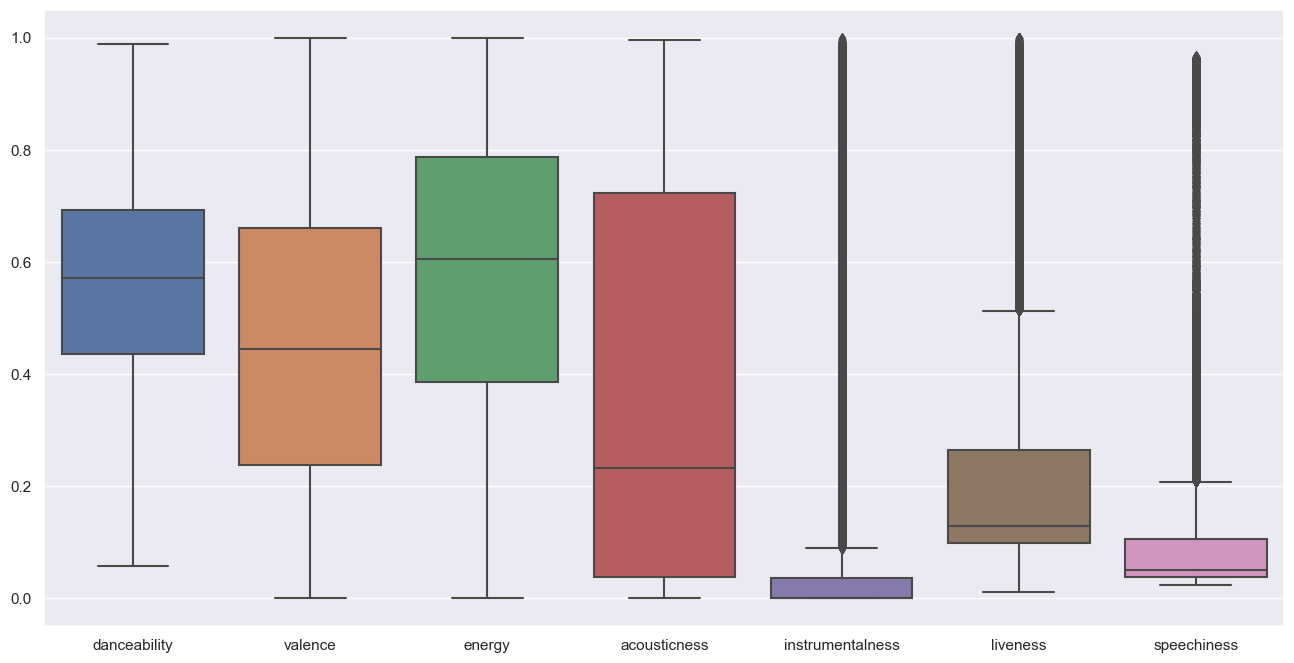

In [16]:
# BOXPLOT for Features (UNI-VARIATE)

f = plt.figure(figsize=(16, 8))
sb.boxplot(data = numFeature, orient = "v")  

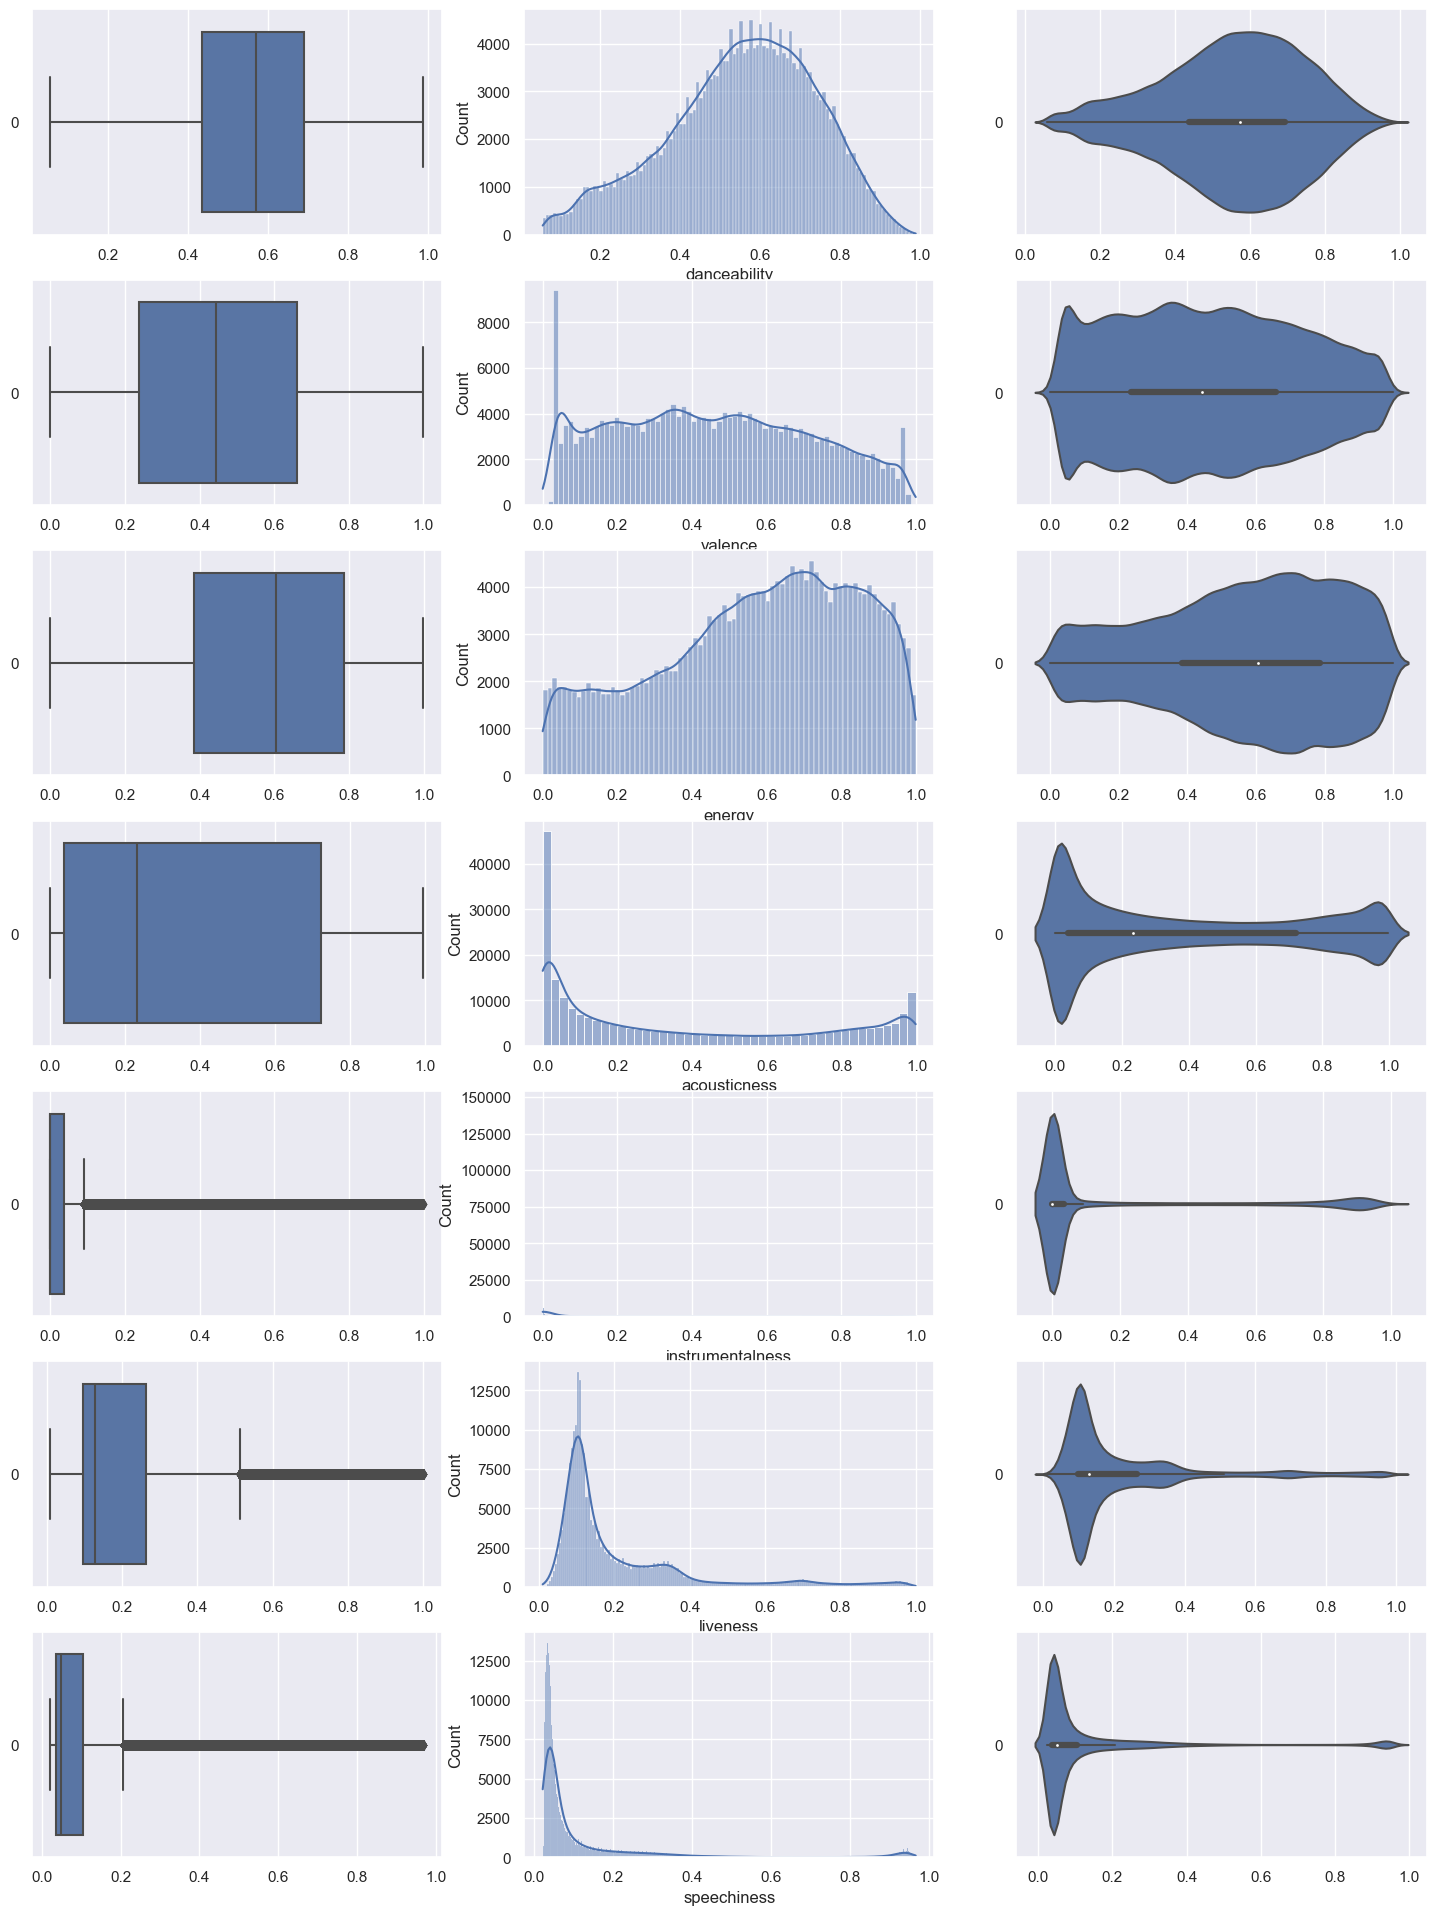

In [17]:
# PLOTS OF 8 Feautures(UNI-VARIATE)

f, axes = plt.subplots(7, 3, figsize=(18, 24)) #7 rows of 3 collums

count = 0

for var in numFeature:  
    
    sb.boxplot(data = numFeature[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numFeature[var], kde = True,ax = axes[count,1])
    sb.violinplot(data = numFeature[var], orient = "h", ax = axes[count,2])
    count += 1 

In [18]:
tempoLoudness = pd.DataFrame(spotdata[["loudness", "tempo"]])

tempoLoudness.describe()

loudness          tempo
count  232725.000000  232725.000000
mean       -9.569885     117.666585
std         5.998204      30.898907
min       -52.457000      30.379000
25%       -11.771000      92.959000
50%        -7.762000     115.778000
75%        -5.501000     139.054000
max         3.744000     242.903000

<Axes: >

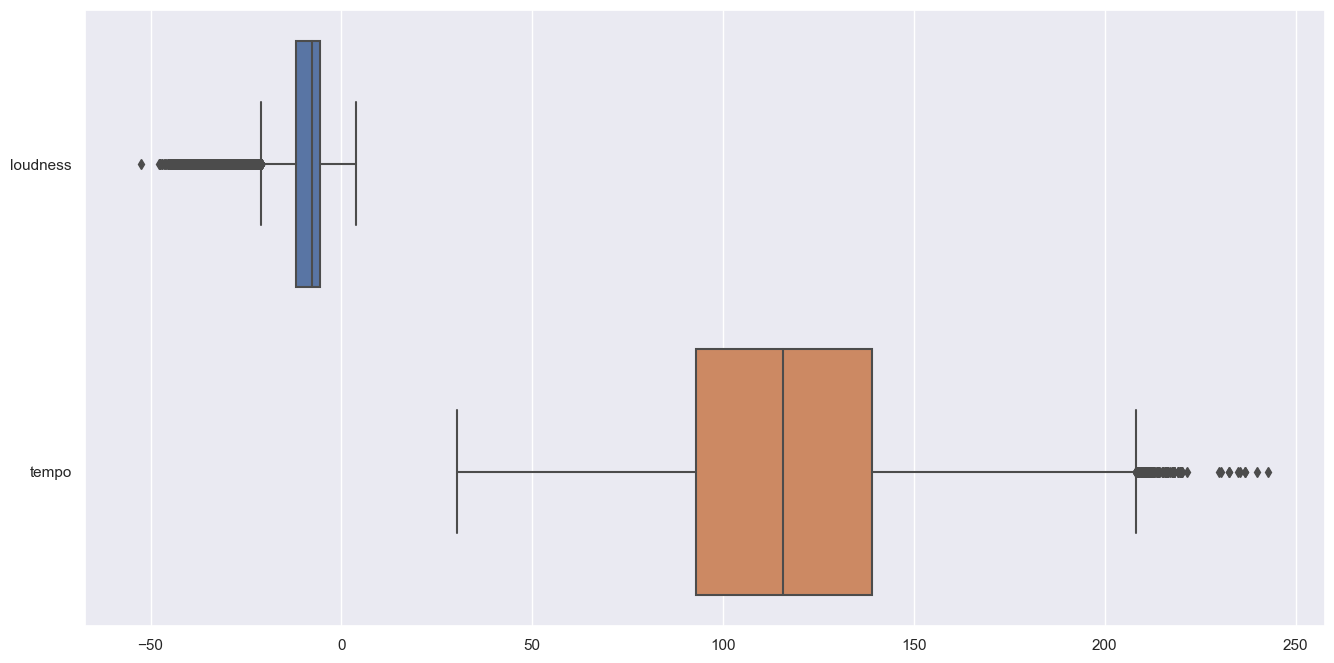

In [19]:

f = plt.figure(figsize=(16, 8))
sb.boxplot(data = tempoLoudness, orient = "h")  

In [20]:
duration = pd.DataFrame(spotdata[["duration_ms"]])

duration.describe()

duration_ms
count  2.327250e+05
mean   2.351223e+05
std    1.189359e+05
min    1.538700e+04
25%    1.828570e+05
50%    2.204270e+05
75%    2.657680e+05
max    5.552917e+06

<Axes: >

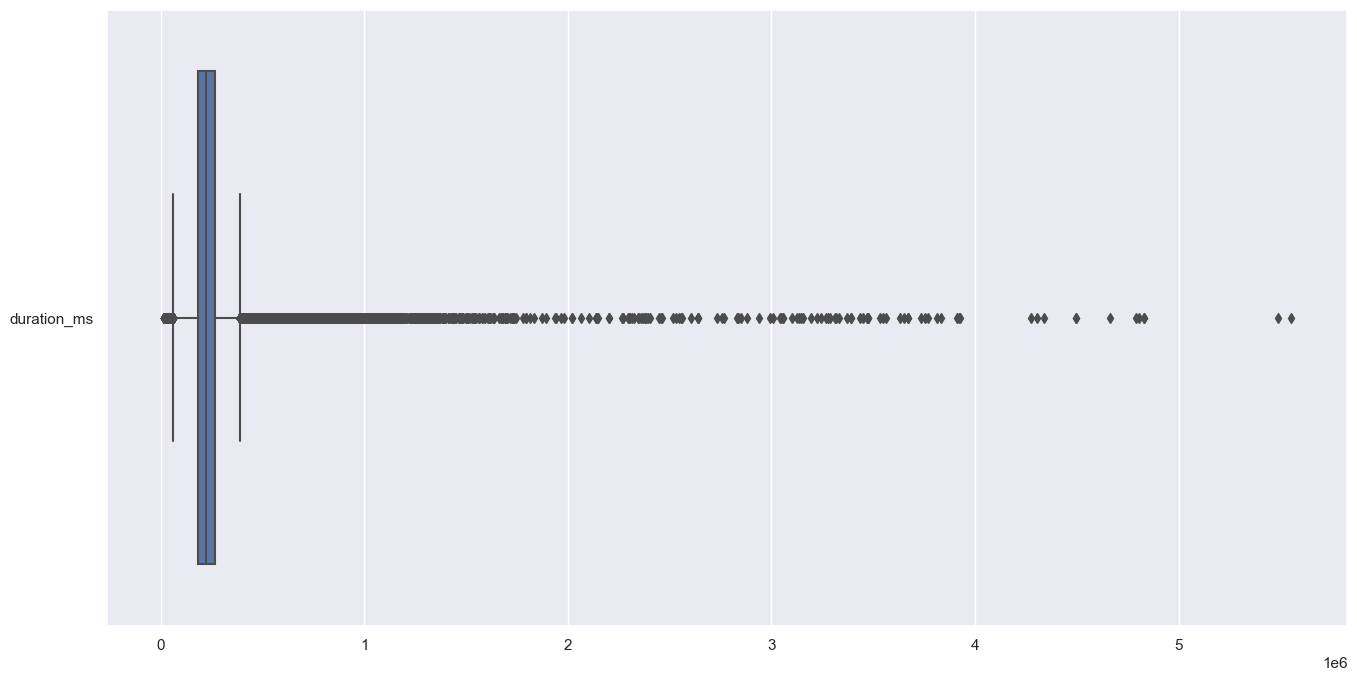

In [21]:

f = plt.figure(figsize=(16, 8))
sb.boxplot(data = duration, orient = "h")  

In [27]:
# Extract unique genres using the unique function
unique_genres = pd.DataFrame(spotdata['genre'].unique())

# Count the number of unique genres, will be used for k means later
num_unique_genres = len(unique_genres)

print("Number of unique genres:", num_unique_genres)
print("Unique genres:", unique_genres)


Number of unique genres: 27
Unique genres:                    0
0              Movie
1                R&B
2          A Capella
3        Alternative
4            Country
5              Dance
6         Electronic
7              Anime
8               Folk
9              Blues
10             Opera
11           Hip-Hop
12  Children's Music
13  Children’s Music
14               Rap
15             Indie
16         Classical
17               Pop
18            Reggae
19         Reggaeton
20              Jazz
21              Rock
22               Ska
23            Comedy
24              Soul
25        Soundtrack
26             World


#### Bi-variate exploration

In [28]:
# DataFrame with the 12 Features + "popularity"
featStreamDF = pd.DataFrame(spotdata[["duration_ms","popularity", "danceability", "energy", "loudness", "speechiness", "acousticness",	"instrumentalness",	"liveness",	"valence", "tempo"]])

In [29]:
# Calculate the correlation matrix(8 features + "streams")
featStreamDF.corr()

duration_ms  popularity  danceability    energy  loudness  \
duration_ms          1.000000    0.002348     -0.125781 -0.030550 -0.047618   
popularity           0.002348    1.000000      0.256564  0.248922  0.363011   
danceability        -0.125781    0.256564      1.000000  0.325807  0.438668   
energy              -0.030550    0.248922      0.325807  1.000000  0.816088   
loudness            -0.047618    0.363011      0.438668  0.816088  1.000000   
speechiness         -0.016171   -0.151076      0.134560  0.145120 -0.002273   
acousticness         0.011203   -0.381295     -0.364546 -0.725576 -0.690202   
instrumentalness     0.076021   -0.210983     -0.364941 -0.378957 -0.506320   
liveness             0.023783   -0.167995     -0.041684  0.192801  0.045686   
valence             -0.141811    0.060076      0.547154  0.436771  0.399901   
tempo               -0.028456    0.081039      0.021939  0.228774  0.228364   

                  speechiness  acousticness  instrumentalness  liveness  \
duration_ms         -0.016171      0.011203          0.076021  0.023783   
popularity          -0.151076     -0.381295         -0.210983 -0.167995   
danceability         0.134560     -0.364546         -0.364941 -0.041684   
energy               0.145120     -0.725576         -0.378957  0.192801   
loudness            -0.002273     -0.690202         -0.506320  0.045686   
speechiness          1.000000      0.150935         -0.177147  0.510147   
acousticness         0.150935      1.000000          0.316154  0.069004   
instrumentalness    -0.177147      0.316154          1.000000 -0.134198   
liveness             0.510147      0.069004         -0.134198  1.000000   
valence              0.023842     -0.325798         -0.307522  0.011804   
tempo               -0.081541     -0.238247         -0.104133 -0.051355   

                   valence     tempo  
duration_ms      -0.141811 -0.028456  
popularity        0.060076  0.081039  
danceability      0.547154  0.021939  
energy            0.436771  0.228774  
loudness          0.399901  0.228364  
speechiness       0.023842 -0.081541  
acousticness     -0.325798 -0.238247  
instrumentalness -0.307522 -0.104133  
liveness          0.011804 -0.051355  
valence           1.000000  0.134857  
tempo             0.134857  1.000000

<Axes: >

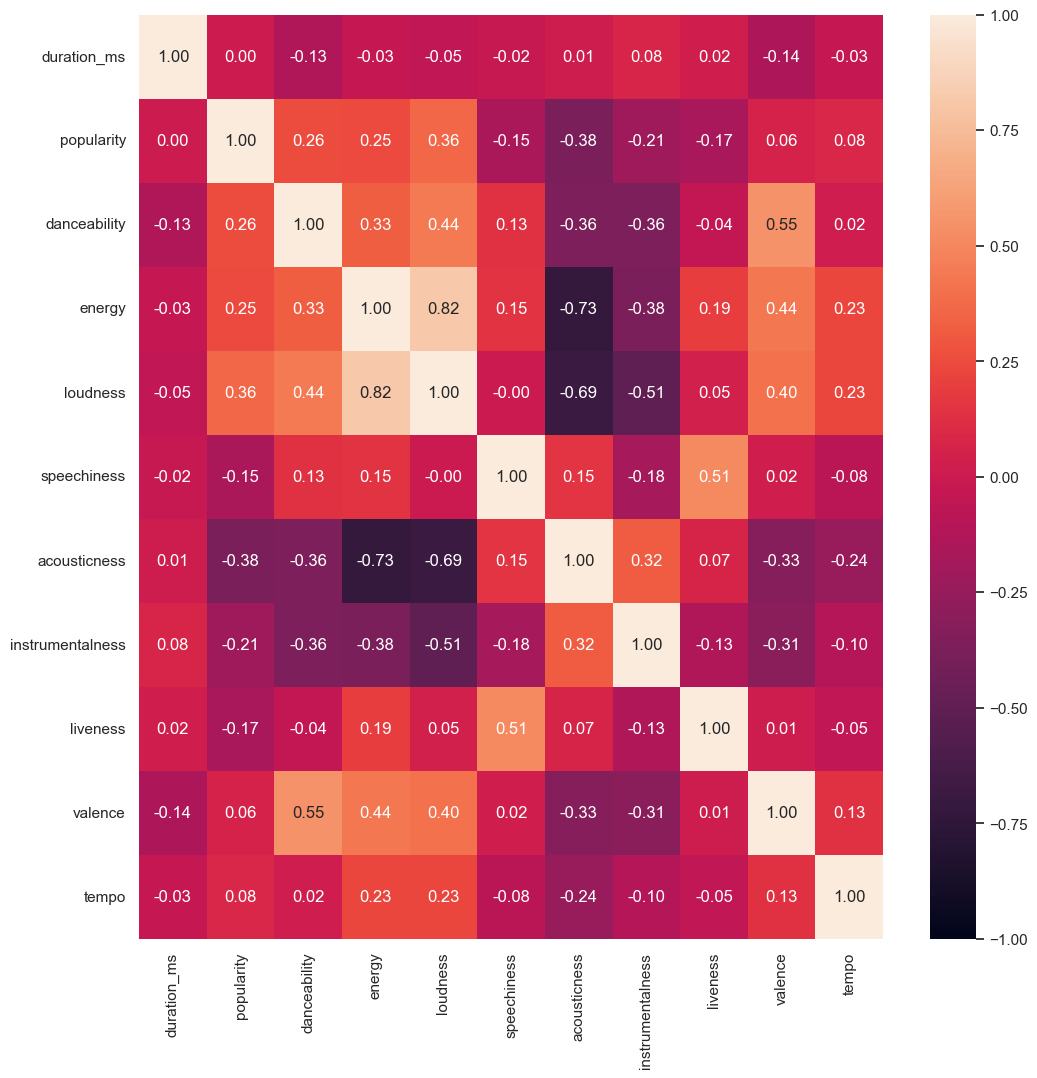

In [30]:
# HEATMAP for corr.
f = plt.figure(figsize=(12, 12))
sb.heatmap(featStreamDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

As seen from the heatmap above, acousticness and loudness have the strongest correlations with popularity, so we will take a deeper look into these two factors.

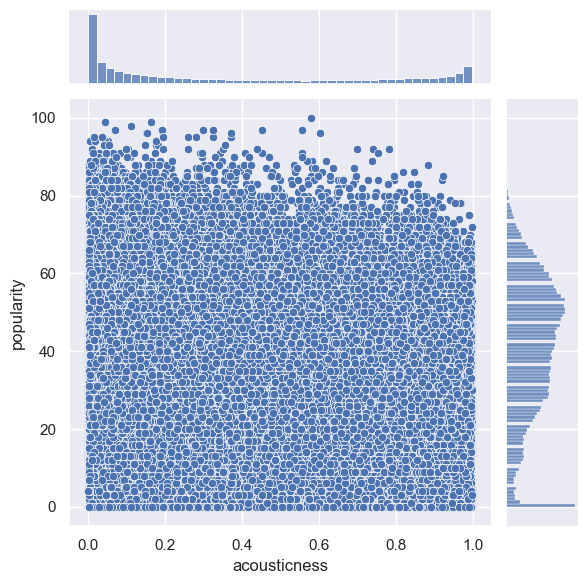

In [31]:
sb.jointplot(x = 'acousticness', y = 'popularity', data = spotdata)


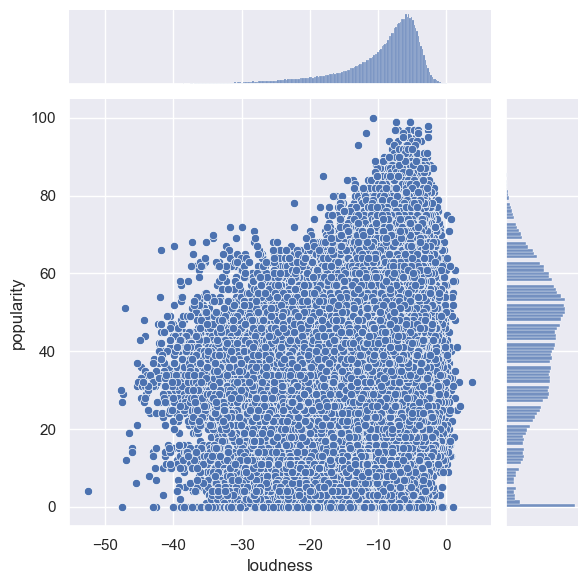

In [32]:
sb.jointplot(x = 'loudness', y = 'popularity', data = spotdata)


C:\Users\OWNER\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


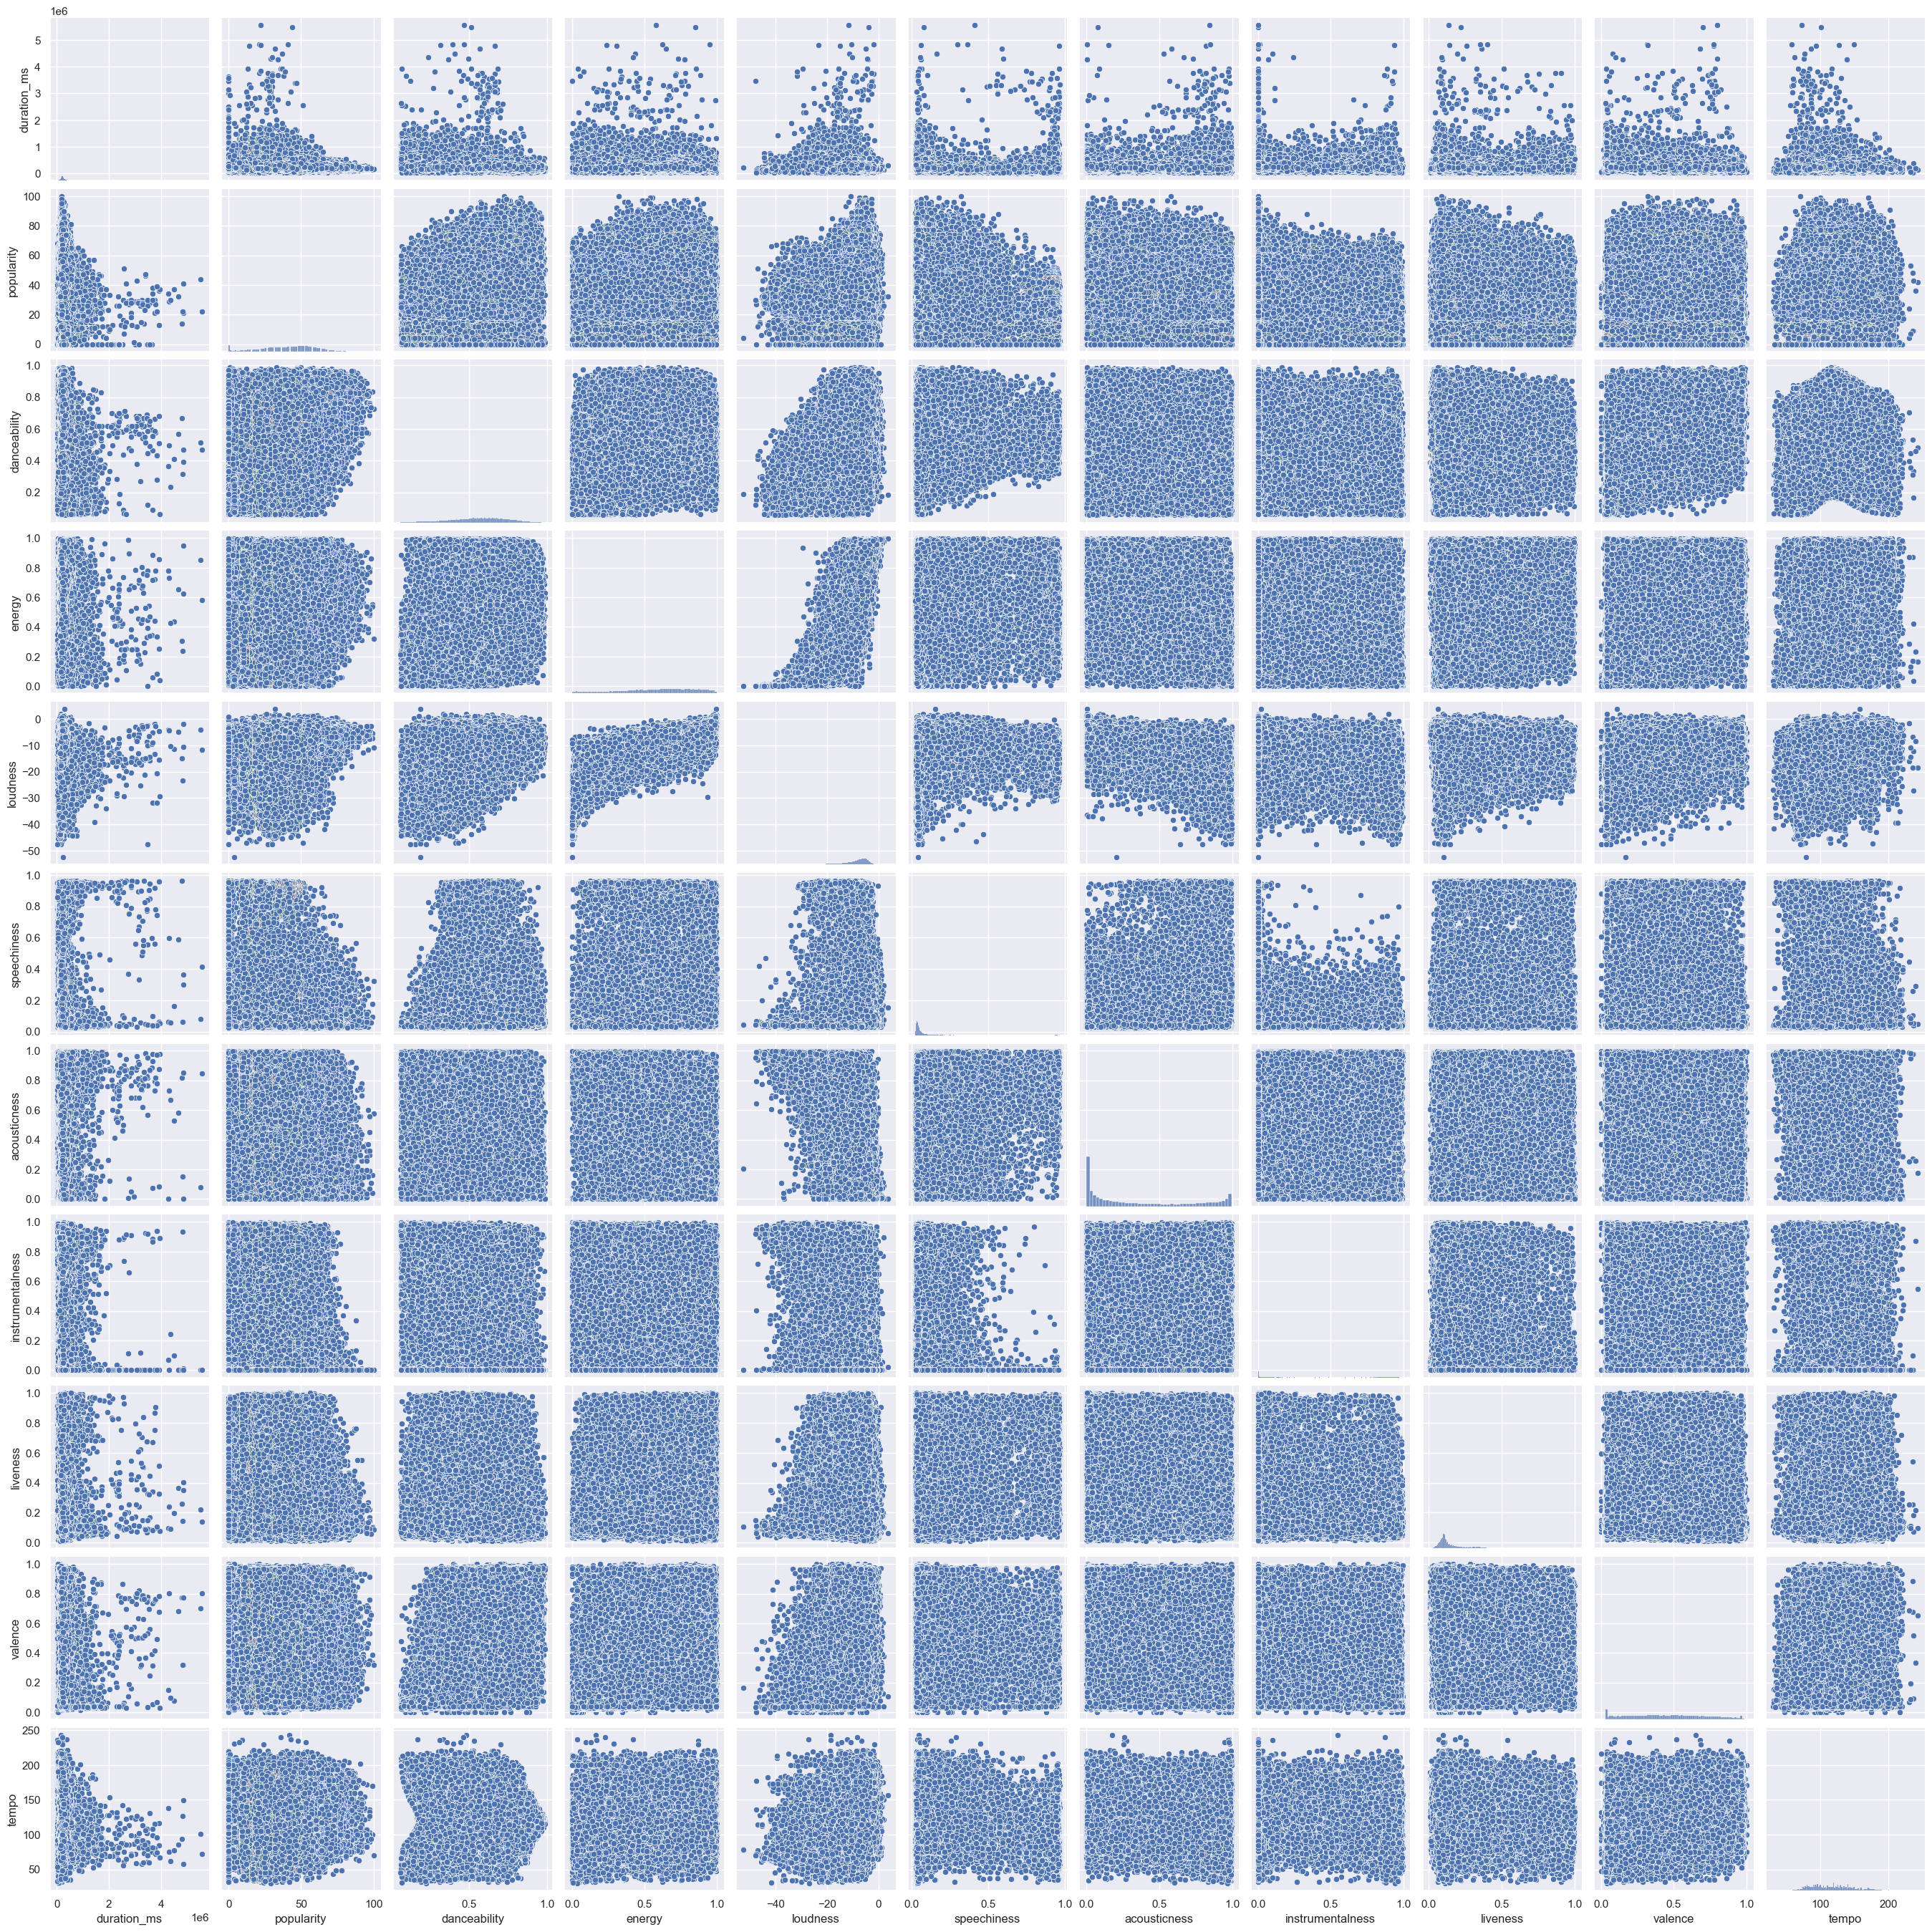

In [35]:
# PAIRPLOT
sb.pairplot(data = featStreamDF) 

# Analysis for categorical variables


In order to determine what defines a song to be popular, we would have to look at the popularity rating. We have decided to use the 75th percentile score for popularity rating as the threshold for a song being popular, which is 55. We can now convert popularity into a binary type into 0s and 1s to represent not popular and popular respectively.  

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

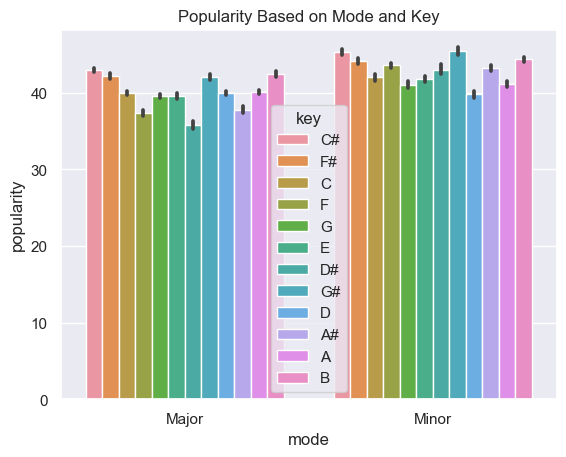

In [36]:
sb.barplot(x = 'mode', y = 'popularity', hue = 'key', data = spotdata)
plt.title('Popularity Based on Mode and Key')